In [0]:
import pandas as pd
import numpy as np
import PIL
import cv2 ,pickle
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/test.csv")
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/train.csv")

In [0]:
test_data.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [0]:
train_data.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [0]:
train = []
for i in train_data["Image"]:
    path = "/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/train/"+i
    img_data = cv2.imread(path)
    img_data = cv2.resize(img_data, (224, 224), 
                           interpolation=cv2.INTER_NEAREST)
    train.append(np.array(img_data))

In [0]:
test = []
for i in test_data["Image"]:
  path = "/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/test/"+i
  img_data = cv2.imread(path)
  img_data = cv2.resize(img_data, (224, 224), 
                           interpolation=cv2.INTER_NEAREST)
  test.append(np.array(img_data))

In [0]:
train[0].shape

(224, 224, 3)

In [0]:
import pickle
pickle.dump(train,open("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/train.npy","wb"))
pickle.dump(test, open("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/test.npy","wb"))

In [0]:
test_img = pickle.load(open("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/test.npy","rb"))
train_img = pickle.load(open("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/train.npy","rb"))

In [0]:
train_img = np.array(train_img)
test_img = np.array(test_img)

In [0]:
train_data.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [0]:
encoder = LabelEncoder()
encoder.fit(train_data["target"])
encoded_Y = encoder.transform(train_data["target"])
dummy_y = np_utils.to_categorical(encoded_Y)

In [0]:
dummy_y.shape

(364, 8)

In [0]:
train_img.shape

(364, 224, 224, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=3, activation='relu', input_shape=train_img[0].shape))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [0]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 254, 254, 3)       84        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 252, 252, 3)       84        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 84, 84, 3)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 82, 82, 3)         84        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 27, 27, 3)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 25, 25, 3)         84        
_________________________________________________________________
flatten_8 (Flatten)          (None, 1875)            

In [0]:
history = model.fit(train_img, dummy_y, epochs=50, batch_size=50)

Epoch 1/50
364/364 [==============================] - 15s 40ms/step - loss: 5.2859 - acc: 0.1291
Epoch 2/50
364/364 [==============================] - 14s 40ms/step - loss: 2.4833 - acc: 0.1511
Epoch 3/50
364/364 [==============================] - 14s 39ms/step - loss: 2.1134 - acc: 0.1868
Epoch 4/50
364/364 [==============================] - 15s 40ms/step - loss: 1.9473 - acc: 0.2005
Epoch 5/50
364/364 [==============================] - 14s 40ms/step - loss: 1.8400 - acc: 0.2610
Epoch 6/50
364/364 [==============================] - 14s 39ms/step - loss: 1.7448 - acc: 0.3269
Epoch 7/50
364/364 [==============================] - 15s 41ms/step - loss: 1.6412 - acc: 0.3874
Epoch 8/50
364/364 [==============================] - 14s 40ms/step - loss: 1.5429 - acc: 0.4341
Epoch 9/50
364/364 [==============================] - 14s 40ms/step - loss: 1.4348 - acc: 0.4753
Epoch 10/50
364/364 [==============================] - 14s 40ms/step - loss: 1.3246 - acc: 0.5275
Epoch 11/50
364/364 [========

In [0]:
from matplotlib import pyplot as plt

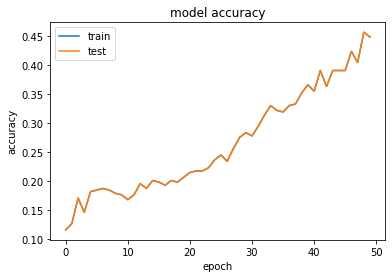

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

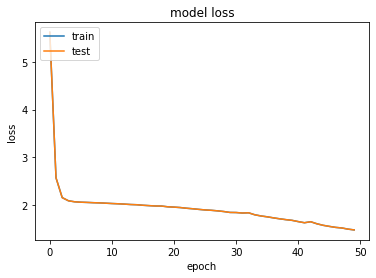

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
pred = model.predict_classes(test_img)
pred = encoder.inverse_transform(pred)
result = pd.DataFrame(pred, test_data["Image"], columns=["target"])
result.to_csv("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/sample.csv")

Resnet

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3), 
    pooling='avg'
)

In [0]:
base_model.trainable = False

model = Sequential([
  base_model,
  Dropout(0.2),
  Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16392     
Total params: 23,604,104
Trainable params: 16,392
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/best_model.h5',
                             monitor='val_loss', 
                             verbose=1, save_best_only= True, 
                             mode='auto')    

In [0]:
batch_size =5
epochs = 100

In [0]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_generator = datagen.flow(train_img, dummy_y,
                                  batch_size=batch_size)

history = model.fit_generator(
         training_generator,
         steps_per_epoch= training_generator.n//training_generator.batch_size,
         callbacks=[checkpoint],
         epochs= epochs)

Epoch 1/100
72/72 [==============================] - 4s 61ms/step - loss: 0.1073 - accuracy: 0.9610
Epoch 2/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0937 - accuracy: 0.9694
Epoch 3/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0288 - accuracy: 0.9944
Epoch 4/100
72/72 [==============================] - 4s 62ms/step - loss: 0.0355 - accuracy: 0.9916
Epoch 5/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0426 - accuracy: 0.9861
Epoch 6/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0294 - accuracy: 0.9889
Epoch 7/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0690 - accuracy: 0.9694
Epoch 8/100
72/72 [==============================] - 4s 62ms/step - loss: 0.0333 - accuracy: 0.9889
Epoch 9/100
72/72 [==============================] - 4s 62ms/step - loss: 0.0314 - accuracy: 0.9889
Epoch 10/100
72/72 [==============================] - 4s 61ms/step - loss: 0.0722 - accuracy: 0.9694

In [0]:
pred = model.predict(test_img)
pred = np.argmax(pred, axis=1)
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/test.csv")

pred = encoder.inverse_transform(pred)
result = pd.DataFrame(pred, test_data["Image"], columns=["target"])
result.to_csv("/content/drive/My Drive/Colab Notebooks/dl_comptetion/dataset/sample.csv")